In [10]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.ensemble import VotingClassifier

#Reading images
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt


#For spliting data
from sklearn.model_selection import train_test_split

#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping
from keras import optimizers
#from google.colab import files

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import preprocess_input, VGG16
import tensorflow as tf

In [9]:
pd.read_csv('../Fashion mnist/train_LbELtWX/train.c')

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0
...,...,...
59995,59996,5
59996,59997,1
59997,59998,3
59998,59999,0


In [16]:
ls

fashion_mnsit_pre.ipynb  test_ScVgIM0/            train_LbELtWX/


In [30]:
X_train = pd.read_csv('train_LbELtWX/train.csv')#Reading Train Data
X_test = pd.read_csv('test_ScVgIM0/test.csv')#Reading test data

X_train_path = '../Fashion mnist/train_LbELtWX/train/'#Train images path
X_test_path =  '../Fashion mnist/test_ScVgIM0/test/'#Test images path

In [7]:
X_train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [11]:
#Coverting images into numpy array.

train_img = []
for img in X_train['id']:
    #Defining image path
    image_path = X_train_path + str(img) +'.png'
    
    #Reading Image
    img = imread(image_path)
    
    #Normalizing the image
    img = img/255
    
    #resizing the image to (28, 28, 1)
    img = resize(img, output_shape = (28, 28, 1), mode = 'constant', anti_aliasing = True)
    
    #Converting the type of pixel to float 32
    img = img.astype('float32')
    
    #Appending the image
    train_img.append(img)
    
#Converting list to numpy array
train_x = np.array(train_img)
train_x.shape

(60000, 28, 28, 1)

In [18]:
test_img = []
for img in X_test['id']:
    #Defining image path
    image_path = X_test_path + str(img) +'.png'
    
    #Reading Image
    img = imread(image_path)
    
    #Normalizing the image
    img = img/255
    
    #resizing the image to (28, 28, 1)
    img = resize(img, output_shape = (28, 28, 1), mode = 'constant', anti_aliasing = True)
    
    #Converting the type of pixel to float 32
    img = img.astype('float32')
    
    #Appending the image
    test_img.append(img)
    
#Converting list to numpy array
test_x = np.array(test_img)
test_x.shape

(10000, 28, 28, 1)

In [19]:
#Saving the numpy array format
np.save('X_train.npy', train_x)
np.save('X_test.npy', test_x)

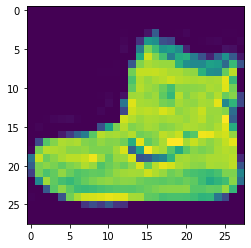

Label: 9


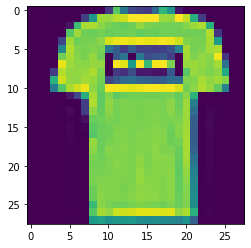

Label: 0


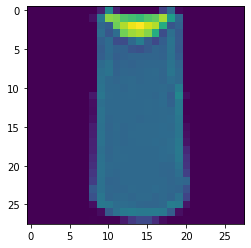

Label: 0


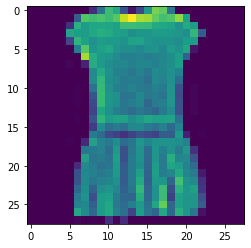

Label: 3


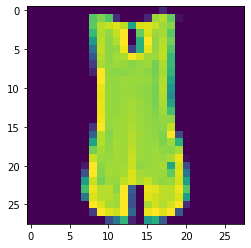

Label: 0


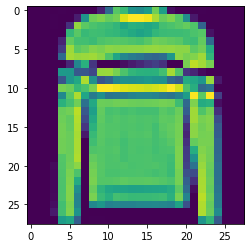

Label: 2


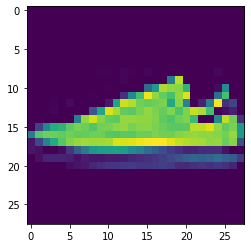

Label: 7


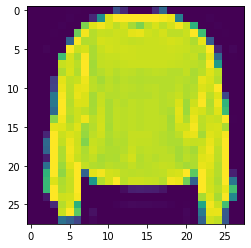

Label: 2


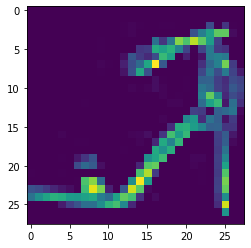

Label: 5


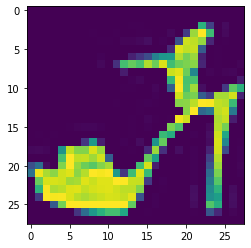

Label: 5


In [24]:

for i in range(10):
    plt.imshow(X_train_[i])
    plt.show()
    print('Label:',X_train.loc[i,'label'])

In [31]:
y = X_train['label'].values
y_train = to_categorical(y, num_classes=10)
y.shape, y_train.shape

((60000,), (60000, 10))

In [37]:
#Reading the array
X_train = np.load('X_train.npy', allow_pickle = True)
X_test = np.load('X_test.npy', allow_pickle = True)

In [38]:
X_train_.shape, X_test_.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
def basic_cnn():

  '''
  Function to build a simple Convolution Neural Network
  '''
  model = Sequential()


  #Adding CNN layers + Max_pooling and Activation 
  model.add(Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]),filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  #Flattening Layer before the Dense Layer 
  model.add(Flatten())

  #Dense Layer with 50neurons
  model.add(Dense(50,activation = 'relu'))
  #Classification or the o/p layer 
  model.add(Dense(10,activation = 'softmax'))

  adam = optimizers.Adam(lr = 0.001)
  model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])

  return model

In [ ]:
model = basic_cnn()

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs = 100, batch_size=1024, verbose=1)

In [ ]:
#To covert the one hot encoded values to 1-D label.

train_val = []
for i in range(y_train.shape[0]):
    for ind in range(0,10):
        if y_train[i][ind] == 1.0:
            train_val.append(ind)
train_val = pd.Series(np.array(train_val))

In [ ]:
test_pred = model.predict_classes(X_test)

In [ ]:
sample_df = pd.read_csv('sample_submission_I5njJSF.csv')
sample_df['label'] = test_pred
sample_df.to_csv('First_tial_pred.csv', index = None)
files.download('First_tial_pred.csv')

In [5]:
## Deeper CNN
def deep_cnn():

  '''
  Function to build a simple Convolution Neural Network
  '''
  model = Sequential()


  #Adding CNN layers + Max_pooling and Activation 
  model.add(Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]),filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Conv2D(filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Conv2D(filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv2D(filters = 50,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer = 'he_normal'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  #Flattening Layer before the Dense Layer 
  model.add(Flatten())

  #Dense Layer with 50neurons
  model.add(Dense(50,activation = 'relu'))
  model.add(Dropout(0.5))
  #Classification or the o/p layer 
  model.add(Dense(10,activation = 'softmax'))

  adam = optimizers.Adam(lr = 0.001)
  model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])

  return model

In [17]:
model = deep_cnn()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [18]:
model.fit(X_train, y_train, validation_split=0.3, epochs = 100, batch_size=1024, verbose=1)

Epoch 1/100
42/42 [==============================] - 6s 112ms/step - loss: 1.6661 - accuracy: 0.4257 - val_loss: 0.8935 - val_accuracy: 0.6823
Epoch 2/100
42/42 [==============================] - 3s 80ms/step - loss: 0.7776 - accuracy: 0.7295 - val_loss: 0.6180 - val_accuracy: 0.7562
Epoch 3/100
42/42 [==============================] - 3s 80ms/step - loss: 0.6402 - accuracy: 0.7785 - val_loss: 0.4049 - val_accuracy: 0.8538
Epoch 4/100
42/42 [==============================] - 3s 81ms/step - loss: 0.5176 - accuracy: 0.8201 - val_loss: 0.3776 - val_accuracy: 0.8594
Epoch 5/100
42/42 [==============================] - 3s 81ms/step - loss: 0.4633 - accuracy: 0.8410 - val_loss: 0.3375 - val_accuracy: 0.8778
Epoch 6/100
42/42 [==============================] - 3s 82ms/step - loss: 0.4454 - accuracy: 0.8451 - val_loss: 0.4182 - val_accuracy: 0.8334
Epoch 7/100
42/42 [==============================] - 3s 82ms/step - loss: 0.5214 - accuracy: 0.8149 - val_loss: 0.4243 - val_accuracy: 0.8407
Epoch

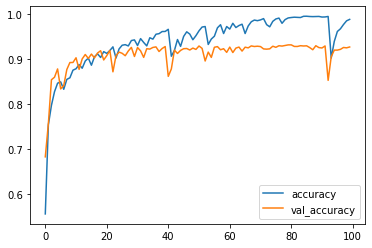

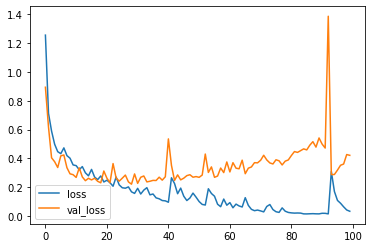

In [19]:
loss = pd.DataFrame(model.history.history)
loss[['accuracy', 'val_accuracy']].plot()
plt.show()
loss[['loss', 'val_loss']].plot()
plt.show()

In [20]:
test_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [34]:
sample_df = pd.read_csv('sample_submission_I5njJSF.csv')

In [35]:
sample_df['label'] = test_pred

In [36]:
sample_df.to_csv('google_trial_pred3.csv', index = None)

In [37]:
files.download('google_trial_pred3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
###Transfer Learning

In [8]:
#Re-size image 
image_size = [224, 224]

In [9]:
vgg = VGG16(input_shape=image_size + [3], include_top = False)
#Cutting the last layer

58900480/58889256 [==============================] - 1s 0us/step


In [11]:
def squeeze_excite_block(filters,input):                      
    se = tf.keras.layers.GlobalAveragePooling2D()(input) #(batch size and channel)
    se = tf.keras.layers.Reshape((1, filters))(se) 
    se = tf.keras.layers.Dense(filters//16, activation='relu')(se)
    se = tf.keras.layers.Dense(filters, activation='sigmoid')(se)
    se = tf.keras.layers.multiply([input, se])
    return se

In [12]:
def make_model():
        s = tf.keras.Input(shape=X_train.shape[1:]) 
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(s)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)          


        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)


        x = tf.keras.layers.concatenate([tf.keras.layers.GlobalMaxPooling2D()(x),
                                         tf.keras.layers.GlobalAveragePooling2D()(x)])

        x = tf.keras.layers.Dense(10,activation='softmax',use_bias=False,
                                  kernel_regularizer=tf.keras.regularizers.l1(0.00025))(x)
        model = tf.keras.Model(inputs=s, outputs=x)
        model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
        return model

In [13]:
batch_size=32
supermodel=[]
for i in range(5):
        np.random.seed(i)
        model=make_model()                
        model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit(X_train, y_train, batch_size=batch_size,shuffle=True,
                    steps_per_epoch=len(X_train) / batch_size, epochs=15,verbose=0)
        model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit(X_train, y_train, batch_size=batch_size,shuffle=True,
                    steps_per_epoch=len(X_train) / batch_size, epochs=3,verbose=0)
        model.compile(optimizer=optimizers.Adam(lr=0.00001), loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit(X_train, y_train, batch_size=batch_size,shuffle=True,
                    steps_per_epoch=len(X_train) / batch_size, epochs=3,verbose=0)
        model.fit(X_train, y_train, batch_size=batch_size,shuffle=True, epochs=1,verbose=0)
        supermodel.append(model)


NameError: name 'X_train' is not defined

In [44]:
supermodel

In [45]:

pred =np.asarray([a.predict(X_test) for a in supermodel])
predictions = np.argmax(np.mean(pred,axis=0),axis=1)

In [46]:
predict = pd.DataFrame(data=predictions ,columns=["label"])

In [48]:
predict

,label
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


In [49]:
sample_df['label'] = predictions

In [50]:
sample_df.to_csv('google_trial_pred2.csv', index = None)

In [51]:
files.download('google_trial_pred2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
#Voting Classifier

m1 = tf.keras.wrappers.scikit_learn.KerasClassifier(deep_cnn,epochs=50,verbose=False)

In [19]:
m2 = tf.keras.wrappers.scikit_learn.KerasClassifier(make_model,epochs=50,verbose=False)

In [20]:
m1._estimator_type = "classifier"

In [21]:
m2._estimator_type = "classifier"

In [23]:
voting2 = VotingClassifier(
  estimators=[('Dense',m1),('Dense2',m2)],
    voting='soft',flatten_transform=True)

In [28]:
voting2.fit(X_train, y_train) #Y_train is not to be in one hot encoding format.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


VotingClassifier(estimators=[('Dense',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fbc9812a350>),
                             ('Dense2',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fbc980bb410>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [29]:
test_pred = voting2.predict(X_test)

In [30]:
test_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [33]:
accuracy_score(y_test, test_pred)

0.9346

In [6]:
from keras.applications.xception import Xception

In [ ]:
Xception()